<a href="https://colab.research.google.com/github/EliOrellana/proyectofinal_diplomado/blob/main/proyectofinal_IAensalud_elizabethorellanabaez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Exploración inicial del conjunto de datos elegido**

# Instalación de librerías

In [27]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import random
import io
import requests
import timeit
%matplotlib notebook
%matplotlib inline

In [28]:
pip install category_encoders

In [29]:
!pip install scikit-learn==1.6.0

# Descripción de columnas y tipos de datos

In [30]:
df = pd.read_csv('/content/Fichas CLAP TOTAL.csv')
print(df.shape)
df.head()

print("Información general del DataFrame:")
print(df.info())

(987, 46)
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 46 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ESTABLECIMIENTO DE SALUD                            986 non-null    object 
 1   RUT                                                 986 non-null    object 
 2   NOMBRE ADOLESCENTE                                  986 non-null    object 
 3   FECHA DE NACIMIENTO                                 986 non-null    object 
 4   EDAD                                                986 non-null    float64
 5   PUEBLO ORIGINARIO                                   986 non-null    object 
 6   NACIONALIDAD                                        986 non-null    object 
 7   SEXO                                                986 non-null    object 
 8   PREVISION DE SALUD                 

Media, Mediana y Desviación estándar

In [31]:
print("\nEstadísticas descriptivas:")
print(df.describe())
df.head()


Estadísticas descriptivas:
             EDAD
count  986.000000
mean    14.803245
std      2.447381
min     10.000000
25%     13.000000
50%     15.000000
75%     17.000000
max     19.000000


,ESTABLECIMIENTO DE SALUD,RUT,NOMBRE ADOLESCENTE,FECHA DE NACIMIENTO,EDAD,PUEBLO ORIGINARIO,NACIONALIDAD,SEXO,PREVISION DE SALUD,FECHA DE ATENCION,...,INTENCIÓN O CONDUCTA SEXUAL,USO MAC ACTUAL,EL ADOLESCENTE HA RECIBIDO CONSEJERÍA SOBRE MAC,VIOLENCIA SEXUAL,PERCEPCIÓN DE IMAGEN CORPORAL,PROYECCIÓN DE VIDA,HA EXISTIDO IDEACIÓN SUICIDA EN EL ÚLTIMO MES,HA EXISTIDO INTENTO SUICIDA EN LOS ÚLTIMOS 3 MESES,REFERENTE ADULTO,DIAGNÓSTICO NUTRICIONAL
0,Centro de Salud Familiar Maipo,22977057-8,Camila Karla Navarro Morales,19/03/2009,13.0,Ninguno,Chilena,Mujer,Fonasa A,03/06/2022,...,Postergadora,Nunca,NO,NO,Crea preocupación,Ausente,NO,NO,Padre,Obeso Severo
1,Centro de Salud Familiar Maipo,22599229-0,Diego Agustin Carrasco Cornejo,06/01/2008,14.0,Ninguno,Chilena,Hombre,Fonasa C,10/05/2022,...,Postergadora,Nunca,SI,NO,Conforme,Confuso,NO,NO,Madre,Déficit ponderal Bajo Peso
2,Centro de Salud Familiar Maipo,23300139-2,Martina Carrasco Cornejo,19/04/2010,12.0,Ninguno,Chilena,Mujer,Fonasa C,10/05/2022,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
3,Centro de Salud Familiar Maipo,21928882-4,Jose Campos Cerda,06/09/2005,16.0,Ninguno,Chilena,Hombre,Fonasa C,03/05/2022,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
4,Centro de Salud Familiar Maipo,22717004-2,Francisca Catalina Fredes Soto,11/05/2008,13.0,Ninguno,Chilena,Mujer,Fonasa A,07/05/2022,...,Postergadora,Nunca,SI,NO,Impide relación con los demás,Confuso,NO,NO,Familiar,Obeso


Número de elementos

In [32]:
df.size

45402

Nombres de las columnas

In [33]:
df.columns

Index(['ESTABLECIMIENTO DE SALUD', 'RUT', 'NOMBRE ADOLESCENTE',
       'FECHA DE NACIMIENTO', 'EDAD', 'PUEBLO ORIGINARIO', 'NACIONALIDAD',
       'SEXO', 'PREVISION DE SALUD', 'FECHA DE ATENCION',
       'PROFESIONAL QUE APLICA INSTRUMENTO', 'PUEBLO INDÍGENA',
       ' ACOMPAÑADO POR ALGUIEN', 'ANTECEDENTES PERINATALES NORMALES',
       'ENFERMEDADES IMPORTANTES', 'TIENE DISCAPACIDAD',
       'PROBLEMAS DE SALUD MENTAL', 'SUFRE VIOLENCIA', 'PROBLEMAS JUDICIALES',
       'CONSUMO DE ALCOHOL Y OTRAS  DROGAS', 'MADRE Y/O PADRE ADOLESCENTE',
       'NIVEL EDUCACIONAL DE MADRE O SUSTITUTA',
       'NIVEL EDUCACIONAL DE PADRE O SUSTITUTO', 'RELACION CON SU FAMILIA',
       'COMPARTE CAMA CON ALGUIEN', 'CONDICIONES SANITARIAS DE DOMICILIO',
       'HACINAMIENTO EN DOMICILIO', 'NIVEL DE ESTUDIO',
       'PROBLEMA EN INSTITUCIÓN EDUCATIVA', 'VIOLENCIA ESCOLAR Y/O BULLYNG',
       'DESERCIÓN O EXCLUSIÓN ESCOLAR', 'TRABAJA', 'TIENE AMIGOS',
       'TIENE EL SUEÑO NORMAL', 'CONSUME TABACO', 'ORIEN

Datos duplicados

In [34]:
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")

df.duplicated()
dato_370 = df.iloc[369]
print(dato_370)
df_new = df.drop_duplicates()
df_new


Número de filas duplicadas: 0
ESTABLECIMIENTO DE SALUD                               Centro de Salud Familiar Alto Jahuel 
RUT                                                                              22590054-k 
NOMBRE ADOLESCENTE                                                   Emiliano Catalan Gomez 
FECHA DE NACIMIENTO                                                              20/12/2007 
EDAD                                                                                    15.0
PUEBLO ORIGINARIO                                                                   Ninguno 
NACIONALIDAD                                                                        Chilena 
SEXO                                                                                 Hombre 
PREVISION DE SALUD                                                                 Fonasa B 
FECHA DE ATENCION                                                                18/04/2023 
PROFESIONAL QUE APLICA INSTRUMENTO     

,ESTABLECIMIENTO DE SALUD,RUT,NOMBRE ADOLESCENTE,FECHA DE NACIMIENTO,EDAD,PUEBLO ORIGINARIO,NACIONALIDAD,SEXO,PREVISION DE SALUD,FECHA DE ATENCION,...,INTENCIÓN O CONDUCTA SEXUAL,USO MAC ACTUAL,EL ADOLESCENTE HA RECIBIDO CONSEJERÍA SOBRE MAC,VIOLENCIA SEXUAL,PERCEPCIÓN DE IMAGEN CORPORAL,PROYECCIÓN DE VIDA,HA EXISTIDO IDEACIÓN SUICIDA EN EL ÚLTIMO MES,HA EXISTIDO INTENTO SUICIDA EN LOS ÚLTIMOS 3 MESES,REFERENTE ADULTO,DIAGNÓSTICO NUTRICIONAL
0,Centro de Salud Familiar Maipo,22977057-8,Camila Karla Navarro Morales,19/03/2009,13.0,Ninguno,Chilena,Mujer,Fonasa A,03/06/2022,...,Postergadora,Nunca,NO,NO,Crea preocupación,Ausente,NO,NO,Padre,Obeso Severo
1,Centro de Salud Familiar Maipo,22599229-0,Diego Agustin Carrasco Cornejo,06/01/2008,14.0,Ninguno,Chilena,Hombre,Fonasa C,10/05/2022,...,Postergadora,Nunca,SI,NO,Conforme,Confuso,NO,NO,Madre,Déficit ponderal Bajo Peso
2,Centro de Salud Familiar Maipo,23300139-2,Martina Carrasco Cornejo,19/04/2010,12.0,Ninguno,Chilena,Mujer,Fonasa C,10/05/2022,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
3,Centro de Salud Familiar Maipo,21928882-4,Jose Campos Cerda,06/09/2005,16.0,Ninguno,Chilena,Hombre,Fonasa C,03/05/2022,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
4,Centro de Salud Familiar Maipo,22717004-2,Francisca Catalina Fredes Soto,11/05/2008,13.0,Ninguno,Chilena,Mujer,Fonasa A,07/05/2022,...,Postergadora,Nunca,SI,NO,Impide relación con los demás,Confuso,NO,NO,Familiar,Obeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,CECOSF Dr. Ramón Galindo,22445098-2,Danae Yeraldi Madrid Acevedo,21/07/2007,16.0,Ninguno,Chilena,Mujer,Fonasa B,17/05/2024,...,Activa,Siempre,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
983,CECOSF Dr. Ramón Galindo,21721458-0,Benjamin Palma Inostroza,25/11/2004,19.0,Ninguno,Chilena,Hombre,Fonasa B,14/06/2024,...,Activa,Siempre,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
984,CECOSF Dr. Ramón Galindo,22108142-0,Antonella Anabalon Morales,19/04/2006,18.0,Ninguno,Chilena,Mujer,Fonasa B,08/05/2024,...,Activa,Siempre,SI,NO,Conforme,Claro,NO,NO,Familiar,Sobrepeso / Riesgo obesidad
985,CECOSF Dr. Ramón Galindo,22917072-4,Juan Pablo Cornejo Lara,03/01/2009,15.0,Ninguno,Chilena,Hombre,Fonasa B,22/05/2024,...,Activa,Nunca,NO,NO,Conforme,Claro,NO,NO,Madre,Sobrepeso / Riesgo obesidad


Datos faltantes o valores incoherentes:

In [35]:
print("\nValores faltantes (NaN) por columna:")
print(df.isnull().sum())


Valores faltantes (NaN) por columna:
ESTABLECIMIENTO DE SALUD                              1
RUT                                                   1
NOMBRE ADOLESCENTE                                    1
FECHA DE NACIMIENTO                                   1
EDAD                                                  1
PUEBLO ORIGINARIO                                     1
NACIONALIDAD                                          1
SEXO                                                  1
PREVISION DE SALUD                                    1
FECHA DE ATENCION                                     1
PROFESIONAL QUE APLICA INSTRUMENTO                    1
PUEBLO INDÍGENA                                       1
 ACOMPAÑADO POR ALGUIEN                               1
ANTECEDENTES PERINATALES NORMALES                     1
ENFERMEDADES IMPORTANTES                              1
TIENE DISCAPACIDAD                                    1
PROBLEMAS DE SALUD MENTAL                             1
SUFRE VIOL

## **2. Preprocesamiento de Datos**

Eliminación de columnas

In [36]:
df= df.drop(['NOMBRE ADOLESCENTE', 'FECHA DE NACIMIENTO', 'FECHA DE ATENCION', 'PREVISION DE SALUD', 'TIENE EL SUEÑO NORMAL'], axis=1, errors='ignore')
df.head()

,ESTABLECIMIENTO DE SALUD,RUT,EDAD,PUEBLO ORIGINARIO,NACIONALIDAD,SEXO,PROFESIONAL QUE APLICA INSTRUMENTO,PUEBLO INDÍGENA,ACOMPAÑADO POR ALGUIEN,ANTECEDENTES PERINATALES NORMALES,...,INTENCIÓN O CONDUCTA SEXUAL,USO MAC ACTUAL,EL ADOLESCENTE HA RECIBIDO CONSEJERÍA SOBRE MAC,VIOLENCIA SEXUAL,PERCEPCIÓN DE IMAGEN CORPORAL,PROYECCIÓN DE VIDA,HA EXISTIDO IDEACIÓN SUICIDA EN EL ÚLTIMO MES,HA EXISTIDO INTENTO SUICIDA EN LOS ÚLTIMOS 3 MESES,REFERENTE ADULTO,DIAGNÓSTICO NUTRICIONAL
0,Centro de Salud Familiar Maipo,22977057-8,13.0,Ninguno,Chilena,Mujer,Enfermero(a),NO,Padre,Si,...,Postergadora,Nunca,NO,NO,Crea preocupación,Ausente,NO,NO,Padre,Obeso Severo
1,Centro de Salud Familiar Maipo,22599229-0,14.0,Ninguno,Chilena,Hombre,Matron(a),NO,Madre,Si,...,Postergadora,Nunca,SI,NO,Conforme,Confuso,NO,NO,Madre,Déficit ponderal Bajo Peso
2,Centro de Salud Familiar Maipo,23300139-2,12.0,Ninguno,Chilena,Mujer,Matron(a),NO,Madre,Si,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
3,Centro de Salud Familiar Maipo,21928882-4,16.0,Ninguno,Chilena,Hombre,Matron(a),NO,Madre,Si,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
4,Centro de Salud Familiar Maipo,22717004-2,13.0,Ninguno,Chilena,Mujer,Matron(a),NO,Solo,Si,...,Postergadora,Nunca,SI,NO,Impide relación con los demás,Confuso,NO,NO,Familiar,Obeso


Imputación de datos

In [37]:
df.fillna(0)
print(df.isnull().sum())

ESTABLECIMIENTO DE SALUD                              1
RUT                                                   1
EDAD                                                  1
PUEBLO ORIGINARIO                                     1
NACIONALIDAD                                          1
SEXO                                                  1
PROFESIONAL QUE APLICA INSTRUMENTO                    1
PUEBLO INDÍGENA                                       1
 ACOMPAÑADO POR ALGUIEN                               1
ANTECEDENTES PERINATALES NORMALES                     1
ENFERMEDADES IMPORTANTES                              1
TIENE DISCAPACIDAD                                    1
PROBLEMAS DE SALUD MENTAL                             1
SUFRE VIOLENCIA                                       1
PROBLEMAS JUDICIALES                                  1
CONSUMO DE ALCOHOL Y OTRAS  DROGAS                    1
MADRE Y/O PADRE ADOLESCENTE                           1
NIVEL EDUCACIONAL DE MADRE O SUSTITUTA          

Eliminación de datos duplicados

In [38]:
df.shape

(987, 41)

In [39]:
df = df.drop_duplicates()

In [40]:
df.shape

(987, 41)

In [41]:
df.isnull().sum()

,0
ESTABLECIMIENTO DE SALUD,1
RUT,1
EDAD,1
PUEBLO ORIGINARIO,1
NACIONALIDAD,1
SEXO,1
PROFESIONAL QUE APLICA INSTRUMENTO,1
PUEBLO INDÍGENA,1
ACOMPAÑADO POR ALGUIEN,1
ANTECEDENTES PERINATALES NORMALES,1


In [42]:
print("\nValores únicos en columnas categóricas:")
for col in ['NACIONALIDAD', 'SEXO', 'PUEBLO INDÍGENA', ' ACOMPAÑADO POR ALGUIEN', 'ANTECEDENTES PERINATALES NORMALES', 'ENFERMEDADES IMPORTANTES', 'TIENE DISCAPACIDAD', 'PROBLEMAS DE SALUD MENTAL', 'SUFRE VIOLENCIA', 'PROBLEMAS JUDICIALES', 'CONSUMO DE ALCOHOL Y OTRAS  DROGAS', 'MADRE Y/O PADRE ADOLESCENTE', 'NIVEL EDUCACIONAL DE MADRE O SUSTITUTA', 'NIVEL EDUCACIONAL DE PADRE O SUSTITUTO', 'RELACION CON SU FAMILIA','HACINAMIENTO EN DOMICILIO', 'NIVEL DE ESTUDIO', 'VIOLENCIA ESCOLAR Y/O BULLYNG', 'DESERCIÓN O EXCLUSIÓN ESCOLAR', 'TRABAJA', 'TIENE AMIGOS', 'CONSUME TABACO', 'ORIENTACIÓN SEXUAL', 'INTENCIÓN O CONDUCTA SEXUAL', 'USO MAC ACTUAL', 'EL ADOLESCENTE HA RECIBIDO CONSEJERÍA SOBRE MAC', 'VIOLENCIA SEXUAL', 'PERCEPCIÓN DE IMAGEN CORPORAL', 'PROYECCIÓN DE VIDA', 'HA EXISTIDO IDEACIÓN SUICIDA EN EL ÚLTIMO MES', 'HA EXISTIDO INTENTO SUICIDA EN LOS ÚLTIMOS 3 MESES', 'REFERENTE ADULTO', 'DIAGNÓSTICO NUTRICIONAL']:
    print(f"\n{col}: {df[col].unique()}")


Valores únicos en columnas categóricas:

NACIONALIDAD: [' Chilena ' ' Ecuador ' ' Venezuela ' ' Colombia ' ' Haití '
 ' Argentina ' ' Bolivia ' nan]

SEXO: [' Mujer ' ' Hombre ' nan]

PUEBLO INDÍGENA: [' NO ' ' SI ' nan]

 ACOMPAÑADO POR ALGUIEN: [' Padre ' ' Madre ' ' Solo ' ' Otro ' ' Pariente ' ' Pareja '
 ' Ambos Padres ' ' Amigo/a ' nan]

ANTECEDENTES PERINATALES NORMALES: [' Si ' ' No ' ' No sé ' nan]

ENFERMEDADES IMPORTANTES: [' No ' ' Si ' ' No sé ' nan]

TIENE DISCAPACIDAD: [' No ' ' Si ' ' No sé ' nan]

PROBLEMAS DE SALUD MENTAL: [' No ' ' No sé ' ' Si ' nan]

SUFRE VIOLENCIA: [' No ' ' Si ' ' No sé ' nan]

PROBLEMAS JUDICIALES: [' Si ' ' No ' ' No sé ' nan]

CONSUMO DE ALCOHOL Y OTRAS  DROGAS: [' Si ' ' No ' ' No sé ' nan]

MADRE Y/O PADRE ADOLESCENTE: [' No ' ' Si ' ' No sé ' nan]

NIVEL EDUCACIONAL DE MADRE O SUSTITUTA: [' Media ' ' Básica ' ' Superior ' ' Ninguno ' nan]

NIVEL EDUCACIONAL DE PADRE O SUSTITUTO: [' Media ' ' Básica ' ' Superior ' ' Ninguno ' nan]

RELACIO

Normalización de datos

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [44]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

print(df.shape)

max_scaler = MaxAbsScaler()

df['EDAD'] = max_scaler.fit_transform(df[['EDAD']])

print("\nDataFrame normalizado Max:")
print(f"Max 'EDAD' normalizado: {df['EDAD'].max()}")
print(f"Min 'EDAD' normalizado: {df['EDAD'].min()}")
df.head()

(987, 41)

DataFrame normalizado Max:
Max 'EDAD' normalizado: 1.0
Min 'EDAD' normalizado: 0.5263157894736842


,ESTABLECIMIENTO DE SALUD,RUT,EDAD,PUEBLO ORIGINARIO,NACIONALIDAD,SEXO,PROFESIONAL QUE APLICA INSTRUMENTO,PUEBLO INDÍGENA,ACOMPAÑADO POR ALGUIEN,ANTECEDENTES PERINATALES NORMALES,...,INTENCIÓN O CONDUCTA SEXUAL,USO MAC ACTUAL,EL ADOLESCENTE HA RECIBIDO CONSEJERÍA SOBRE MAC,VIOLENCIA SEXUAL,PERCEPCIÓN DE IMAGEN CORPORAL,PROYECCIÓN DE VIDA,HA EXISTIDO IDEACIÓN SUICIDA EN EL ÚLTIMO MES,HA EXISTIDO INTENTO SUICIDA EN LOS ÚLTIMOS 3 MESES,REFERENTE ADULTO,DIAGNÓSTICO NUTRICIONAL
0,Centro de Salud Familiar Maipo,22977057-8,0.684211,Ninguno,Chilena,Mujer,Enfermero(a),NO,Padre,Si,...,Postergadora,Nunca,NO,NO,Crea preocupación,Ausente,NO,NO,Padre,Obeso Severo
1,Centro de Salud Familiar Maipo,22599229-0,0.736842,Ninguno,Chilena,Hombre,Matron(a),NO,Madre,Si,...,Postergadora,Nunca,SI,NO,Conforme,Confuso,NO,NO,Madre,Déficit ponderal Bajo Peso
2,Centro de Salud Familiar Maipo,23300139-2,0.631579,Ninguno,Chilena,Mujer,Matron(a),NO,Madre,Si,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
3,Centro de Salud Familiar Maipo,21928882-4,0.842105,Ninguno,Chilena,Hombre,Matron(a),NO,Madre,Si,...,Postergadora,Nunca,SI,NO,Conforme,Claro,NO,NO,Madre,Normal o Eutrofia
4,Centro de Salud Familiar Maipo,22717004-2,0.684211,Ninguno,Chilena,Mujer,Matron(a),NO,Solo,Si,...,Postergadora,Nunca,SI,NO,Impide relación con los demás,Confuso,NO,NO,Familiar,Obeso


Verificar valores únicos en columnas categóricas

# Variable objetivo y preparación de datos

In [45]:
df["USO MAC ACTUAL"].value_counts()/len(df)

,count
USO MAC ACTUAL,
Nunca,0.614995
Siempre,0.349544
A veces,0.034448


In [46]:
df.isnull().sum()/len(df)

,0
ESTABLECIMIENTO DE SALUD,0.001013
RUT,0.001013
EDAD,0.001013
PUEBLO ORIGINARIO,0.001013
NACIONALIDAD,0.001013
SEXO,0.001013
PROFESIONAL QUE APLICA INSTRUMENTO,0.001013
PUEBLO INDÍGENA,0.001013
ACOMPAÑADO POR ALGUIEN,0.001013
ANTECEDENTES PERINATALES NORMALES,0.001013


Transformación de datos

In [47]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.6.0

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
  Using cached scikit_learn-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)


In [48]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

Estandarización de datos: Uso de One Hot encoding

In [49]:
#Lista de columnas categóricas por codificar
columnas_categoricas = ['NACIONALIDAD', 'SEXO', 'PUEBLO INDÍGENA', ' ACOMPAÑADO POR ALGUIEN', 'ANTECEDENTES PERINATALES NORMALES', 'ENFERMEDADES IMPORTANTES', 'TIENE DISCAPACIDAD', 'PROBLEMAS DE SALUD MENTAL', 'SUFRE VIOLENCIA', 'PROBLEMAS JUDICIALES', 'CONSUMO DE ALCOHOL Y OTRAS  DROGAS', 'MADRE Y/O PADRE ADOLESCENTE', 'NIVEL EDUCACIONAL DE MADRE O SUSTITUTA', 'NIVEL EDUCACIONAL DE PADRE O SUSTITUTO', 'RELACION CON SU FAMILIA','HACINAMIENTO EN DOMICILIO', 'NIVEL DE ESTUDIO', 'VIOLENCIA ESCOLAR Y/O BULLYNG', 'DESERCIÓN O EXCLUSIÓN ESCOLAR', 'TRABAJA', 'TIENE AMIGOS', 'CONSUME TABACO', 'ORIENTACIÓN SEXUAL', 'INTENCIÓN O CONDUCTA SEXUAL', 'USO MAC ACTUAL', 'EL ADOLESCENTE HA RECIBIDO CONSEJERÍA SOBRE MAC', 'VIOLENCIA SEXUAL', 'PERCEPCIÓN DE IMAGEN CORPORAL', 'PROYECCIÓN DE VIDA', 'HA EXISTIDO IDEACIÓN SUICIDA EN EL ÚLTIMO MES', 'HA EXISTIDO INTENTO SUICIDA EN LOS ÚLTIMOS 3 MESES', 'REFERENTE ADULTO', 'DIAGNÓSTICO NUTRICIONAL']

# Aplicación de One Hot Encoding
df_encoded = pd.get_dummies(df, columns=columnas_categoricas)

# Mostrar las primeras filas del DataFrame codificado
print(df_encoded.head())

           ESTABLECIMIENTO DE SALUD           RUT      EDAD PUEBLO ORIGINARIO  \
0   Centro de Salud Familiar Maipo    22977057-8   0.684211          Ninguno    
1   Centro de Salud Familiar Maipo    22599229-0   0.736842          Ninguno    
2   Centro de Salud Familiar Maipo    23300139-2   0.631579          Ninguno    
3   Centro de Salud Familiar Maipo    21928882-4   0.842105          Ninguno    
4   Centro de Salud Familiar Maipo    22717004-2   0.684211          Ninguno    

  PROFESIONAL QUE APLICA INSTRUMENTO COMPARTE CAMA CON ALGUIEN  \
0                      Enfermero(a)                        NO    
1                         Matron(a)                        NO    
2                         Matron(a)                        NO    
3                         Matron(a)                        NO    
4                         Matron(a)                        NO    

  CONDICIONES SANITARIAS DE DOMICILIO PROBLEMA EN INSTITUCIÓN EDUCATIVA  \
0                                 SI     

USO DE RANDOM FOREST

In [50]:
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [51]:
!pip install category_encoders

from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import category_encoders as ce

Precisión del modelo con accuracy: 0.50
Precisión del modelo con precision: 0.52
Precisión del modelo con recall_score: 0.71
Precisión del modelo con f1_score: 0.60


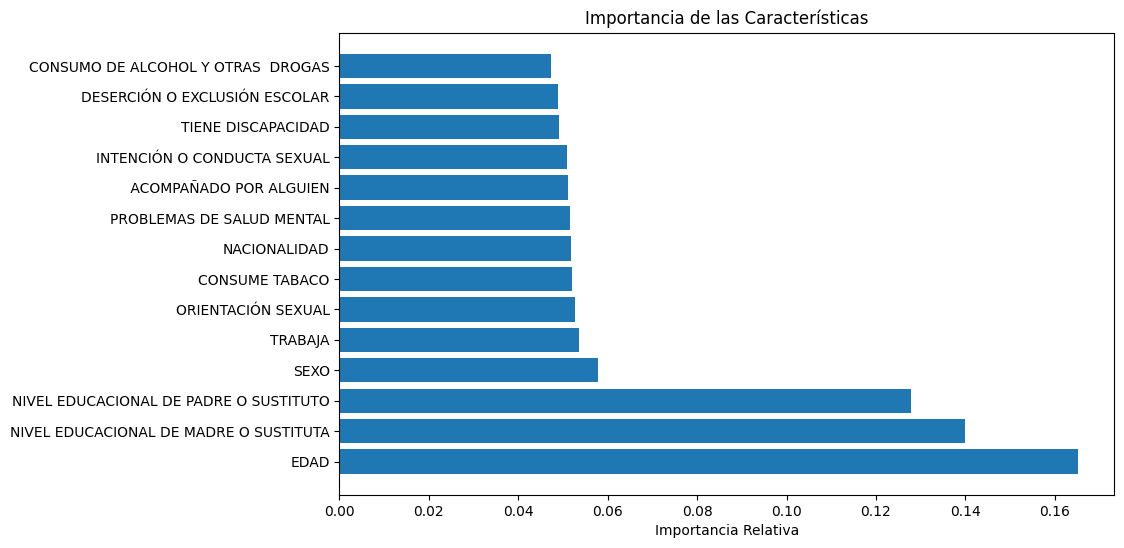

In [52]:
# Seleccionar características determinantes en el uso de MAC en adolescentes
np.random.seed(42)
data = {
    'EDAD': np.random.randint(10, 19, 200),
    'NACIONALIDAD': np.random.randint(0, 2, 200),
    'SEXO': np.random.randint(0, 2, 200),
    ' ACOMPAÑADO POR ALGUIEN': np.random.randint(0, 2, 200),
    'PROBLEMAS DE SALUD MENTAL': np.random.randint(0, 2, 200),
    'TIENE DISCAPACIDAD': np.random.randint(0, 2, 200),
    'CONSUMO DE ALCOHOL Y OTRAS  DROGAS': np.random.randint(0, 2, 200),
    'NIVEL EDUCACIONAL DE MADRE O SUSTITUTA': np.random.randint(0, 5, 200),
    'NIVEL EDUCACIONAL DE PADRE O SUSTITUTO': np.random.randint(0, 5, 200),
    'DESERCIÓN O EXCLUSIÓN ESCOLAR': np.random.randint(0, 2, 200),
    'TRABAJA': np.random.randint(0, 2, 200),
    'CONSUME TABACO': np.random.randint(0, 2, 200),
    'ORIENTACIÓN SEXUAL': np.random.randint(0, 2, 200),
    'INTENCIÓN O CONDUCTA SEXUAL': np.random.randint(0, 2, 200),
    'USO MAC ACTUAL': np.random.randint(0, 2, 200)  # Variable objetivo
}

# Convertir los datos en un DataFrame
df = pd.DataFrame(data)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Separar las características (X) de la variable objetivo (y)
X = df.drop(columns=['USO MAC ACTUAL'])  # Características
y = df['USO MAC ACTUAL']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = rf_model.predict(X_test)

# Evaluar la precisión del modelo con las métricas de evaluación de clasificación
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"Precisión del modelo con precision: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Precisión del modelo con recall_score: {recall:.2f}")

f1 = f1_score(y_test, y_pred)
print(f"Precisión del modelo con f1_score: {f1:.2f}")

# Obtener la importancia de las características
importances = rf_model.feature_importances_

# Crear un gráfico para visualizar la importancia de las características
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()